In [6]:
!python3 -m pip install matplotlib

In [10]:
!which python

/home/v-yiruxu/anaconda3/bin/python


In [37]:
from nni.experiment import Experiment
experiment = Experiment.connect(8476)

[2021-04-06 12:31:35] Tuner not set, wait for connect...
[2021-04-06 12:31:35] Connect to port 8476 success, experiment id is xuvkmbco, status is DONE.


In [38]:
experiment.get_status() == 'DONE'

True

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import MultipleLocator

ModuleNotFoundError: No module named 'matplotlib'

In [39]:
experiment.get_experiment_profile()['params']['experimentName']

'cifar100_tpe_nonested_100_v2'

In [40]:
df=pd.read_csv('results/tpe_nonested.csv',low_memory=False)
# df = pd.DataFrame()
df[experiment.get_experiment_profile()['params']['experimentName']]=data_list


df.to_csv('results/tpe_nonested.csv',index=0,header=1)

Text(0.5, 1.0, 'nasbench201_evolution_completed_100')

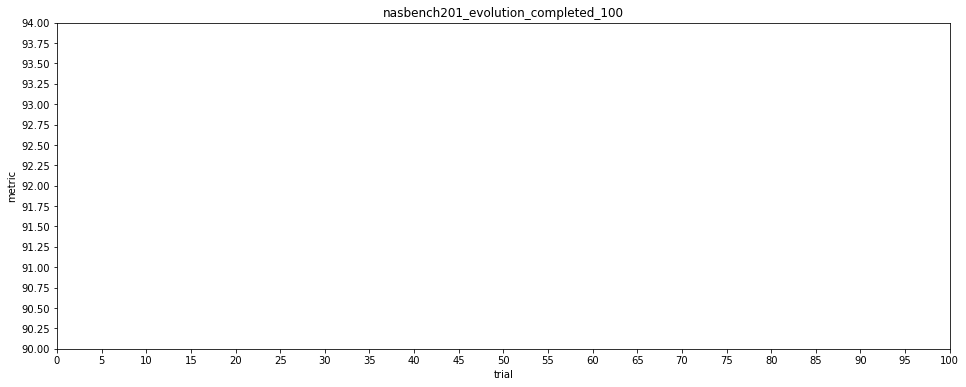

In [5]:
trials = experiment.list_trial_jobs()
label, total, acc = [], [], []
begin = 0
for i,item in enumerate(trials):
    try:
        a = item.finalMetricData[0].data
    except:
        continue
        print(i)
    else:
        if item.finalMetricData[0].data > 90:
            total.append(i)
            acc.append(round(item.finalMetricData[0].data,2))
            label.append((i,round(item.finalMetricData[0].data,2)))
plt.figure(figsize=(16,6))
plt.scatter(total, acc)
for i, txt in enumerate(label):
    plt.annotate(txt, (total[i], acc[i]))
plt.xlabel("trial")
plt.ylabel("metric")

ax=plt.gca()
x_major_locator=MultipleLocator(5)
y_major_locator=MultipleLocator(0.25)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,100)
plt.ylim(90,94)
# s = 'nasbench201_'+'evolution'+'_pruned_100'
s = 'nasbench201_'+'evolution'+'_completed_100'
plt.title(s)
# plt.savefig('result/'+s+'.png')

In [9]:
experiment.stop()

[2021-03-07 17:22:14] Stopping experiment, please wait...
[2021-03-07 17:22:14] Experiment stopped


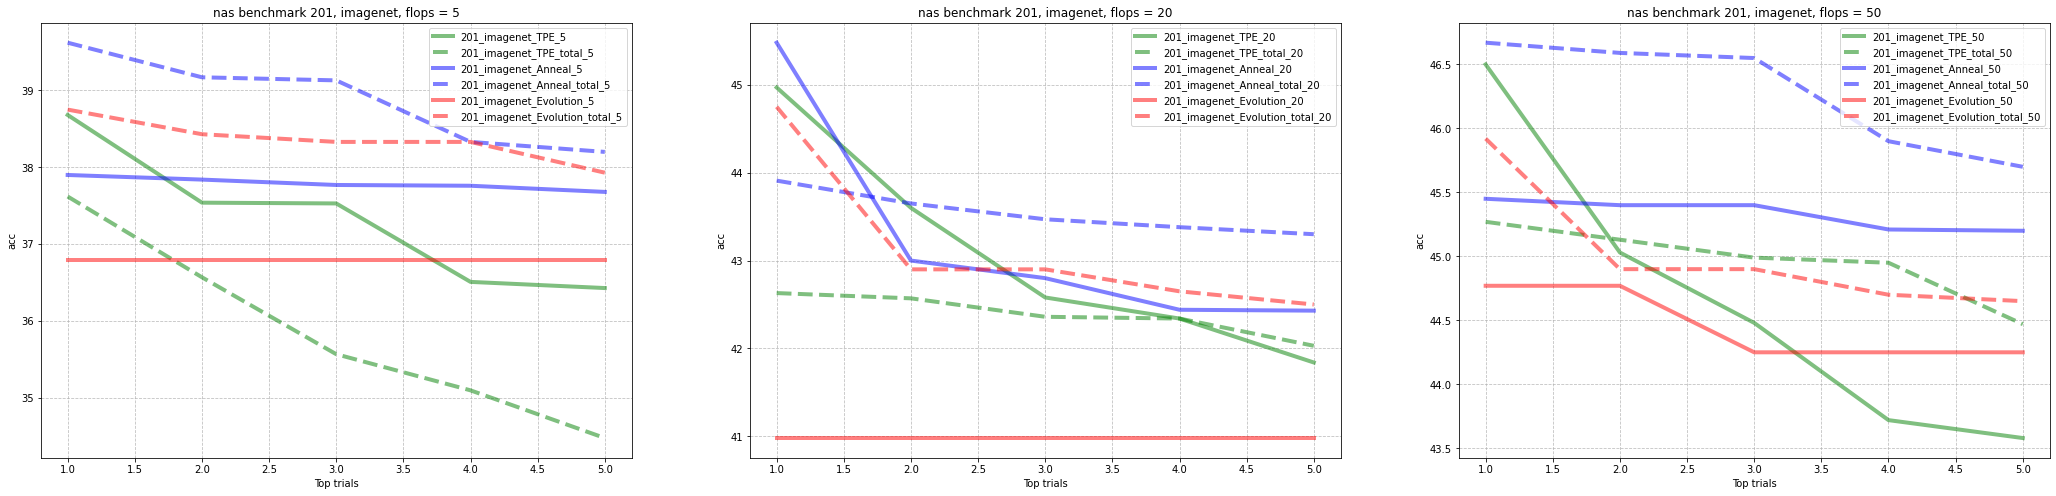

In [84]:
fig, ax = plt.subplots(figsize=(36,8))

colorlist = ['g', 'g', 'b','b','r','r']
linestyles = ['-','--','-','--','-','--']
x = [1, 2, 3, 4, 5]
flops = ['5','20','50']

for m in range(3):
    plt.subplot(1, 3, 1 + m)
    for i in range(6):
        plt.plot(x, df.iloc[m*6+i, 1:], color=colorlist[i], alpha=0.5, linewidth=4.0, linestyle=linestyles[i],label=df.iloc[m*6+i, 0])
        plt.legend(loc='upper right')
        plt.title('nas benchmark 201, imagenet, flops = '+flops[m])
        plt.xlabel('Top trials')
        plt.ylabel('acc')
        plt.grid(True, linestyle='--', alpha=0.8)
plt.savefig("result/imagenet.png")
plt.show()

## plot2

In [8]:
def process_df(path, trial_num=10):
    df = pd.read_csv(path)
    sorted_array = np.abs(np.sort(-df.values,axis=0))[:,0:3]
    sorted_array = np.sum(sorted_array,axis=1)/sorted_array.shape[1]
    return sorted_array[:trial_num]    

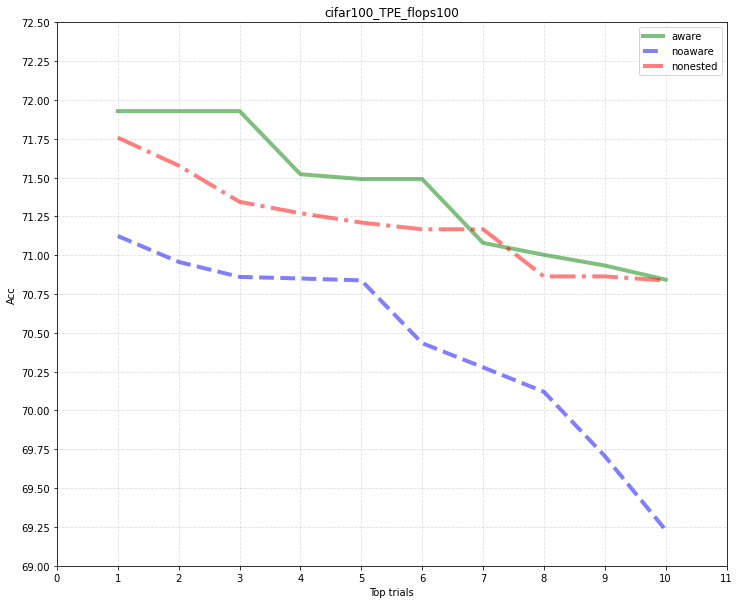

In [9]:
trial_num = 10
x = np.arange(1,trial_num+1)
paths = ['results/tpe_aware.csv', 'results/tpe_noaware.csv', 'results/tpe_nonested.csv']
labels = ['aware', 'noaware', 'nonested']
colors = ['g', 'b', 'r']
linestyles = ['-', '--', '-.']
plt.figure(figsize=(12,10))
for i in range(3):
    plt.plot(x, process_df(paths[i], trial_num), color=colors[i], alpha=0.5, linewidth=4.0, linestyle=linestyles[i], label=labels[i])
plt.xlabel('Top trials')
plt.ylabel('Acc')
plt.grid(True, linestyle='--', alpha=0.4)
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.25)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,trial_num+1)
plt.ylim(69,72.5) #66.25,68.75, 66.5,70, 
plt.title('cifar100_TPE_flops100')
plt.legend()
plt.savefig('results/cifar100_tpe_flops100_1.png')
plt.show()

In [2]:
 # trend graph
 df = pd.read_csv('results/timeline.csv',parse_dates = ['month'])

In [15]:
df.columns.values.tolist()[1:]

['Deep learning', 'Artificial Intelligence', 'Neural Network']

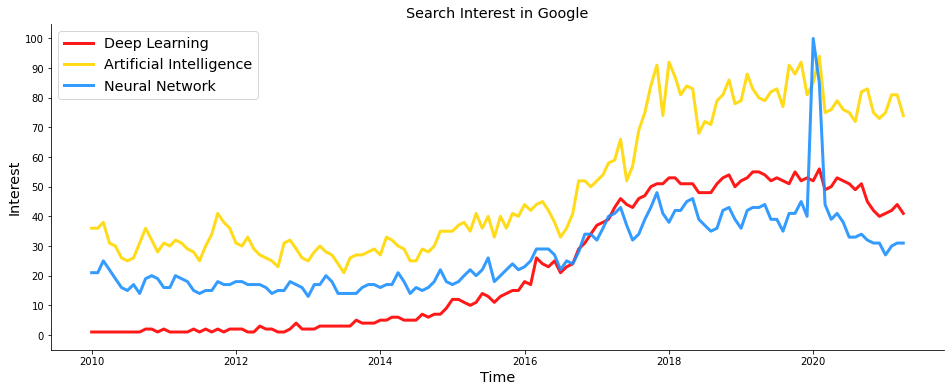

In [23]:
x = np.arange(1,df.shape[0]+1)
labels = df.columns.values.tolist()[1:]
colors = ['red', 'gold', 'dodgerblue']
linestyles = ['-', '--', '-.']
plt.figure(figsize=(16,6))
for i in range(3):
    plt.plot(df['month'], df[labels[i]], color=colors[i], alpha=0.9, linewidth=3.0, linestyle='-', label=labels[i])
plt.xlabel('Time',fontsize='x-large')
plt.ylabel('Interest',fontsize='x-large')
# plt.grid(True, linestyle='--', alpha=0.4)
# x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
# plt.xlim(0,trial_num+1)
plt.ylim(-5,105) #66.25,68.75, 66.5,70, 
plt.title('Search Interest in Google', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.savefig('results/Search_Interest_in_Google.png')
plt.show()

## plot3